<a href="https://colab.research.google.com/github/Fallennnnnn/movie-recommender/blob/main/Movie_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommender System**

# Data Load and Understanding

## Import necessary libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

## Load the dataset

In [48]:
url = "https://raw.githubusercontent.com/Fallennnnnn/movie-recommender/main/Dataset/mymoviedb.csv"
movies = pd.read_csv(url, lineterminator='\n')

## Check dataset

In [9]:
movies.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


**Tabel 1**

Mengecek dataset didalam data csv

## Exploratory Data Analysis

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [36]:
movies.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [11]:
movies.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


**Tabel 2**

Melakukan pengecekan informasi dari dataset

### Visualize Table

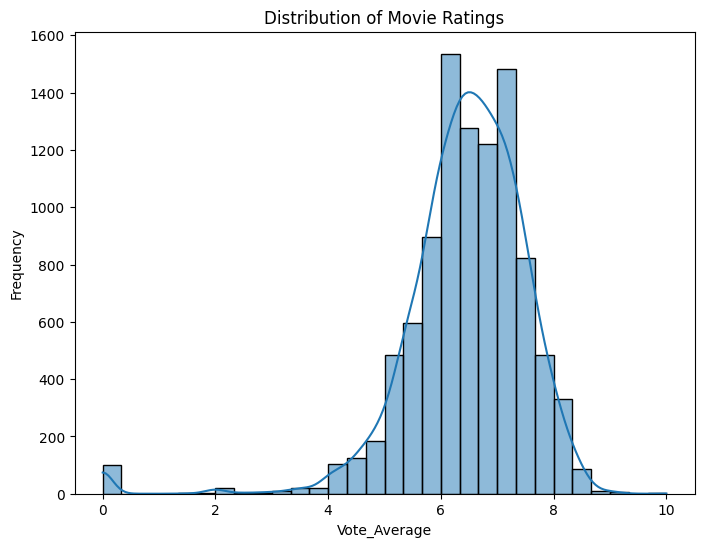

In [13]:
# Visualize the distribution of movie ratings (Vote_Average)
plt.figure(figsize=(8, 6))
sns.histplot(data=movies, x='Vote_Average', bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Vote_Average')
plt.ylabel('Frequency')
plt.show()

**Gambar 1.**
Dapat dilihat dari Gambar 1 visualisasi rata rata rating dari film berada pada 6 hingga 8

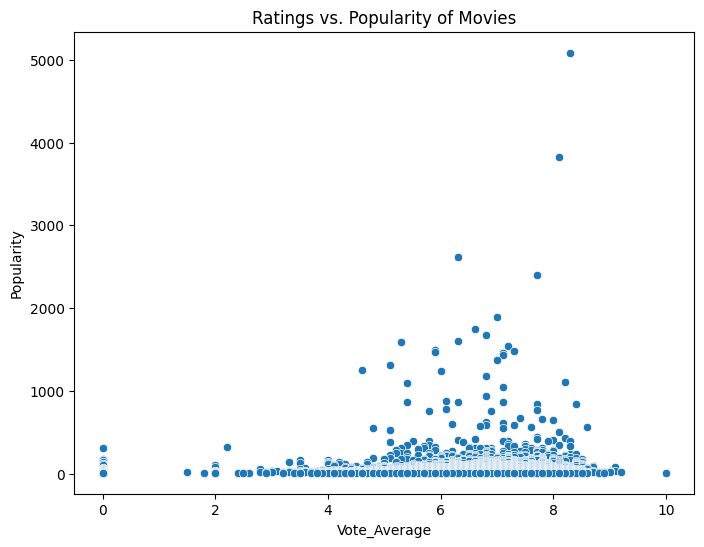

In [15]:
# Visualize the scatter plot of ratings vs. popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=movies, x='Vote_Average', y='Popularity')
plt.title('Ratings vs. Popularity of Movies')
plt.xlabel('Vote_Average')
plt.ylabel('Popularity')
plt.show()

**Gambar 2.**

Gambar tersebut menunjukkan scatter plot dari peringkat dan popularitas film. Peringkat adalah nilai dari 1 hingga 10 yang diberikan oleh pengguna untuk film tersebut, sedangkan popularitas adalah jumlah pengguna yang telah menonton film tersebut. Dari gambar tersebut, dapat dilihat bahwa terdapat hubungan positif antara peringkat dan popularitas. Artinya, film-film dengan peringkat yang lebih tinggi juga cenderung lebih populer.

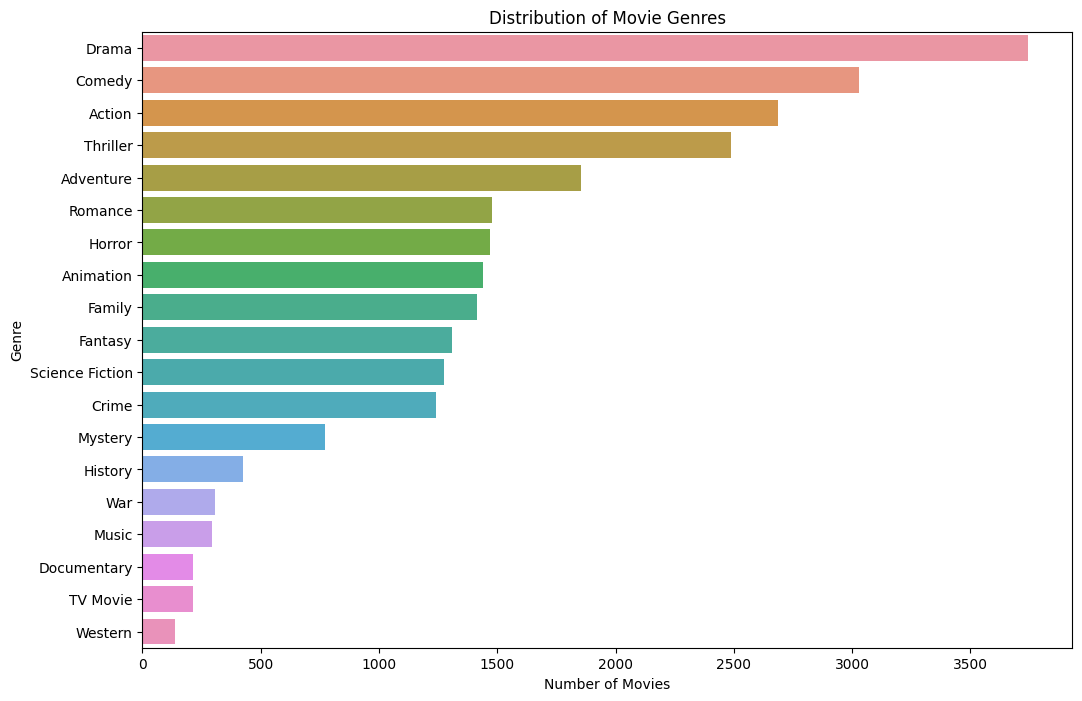

In [16]:
# Visualize the distribution of movie genres
genre_counts = movies['Genre'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, orient='h')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

**Gambar 3**

Pada gambar 3 diatas merupakan distribusi jumlah film berdasarkan genrenya dimana film dengan genre terbanyak adalah drama, comedy, dan action

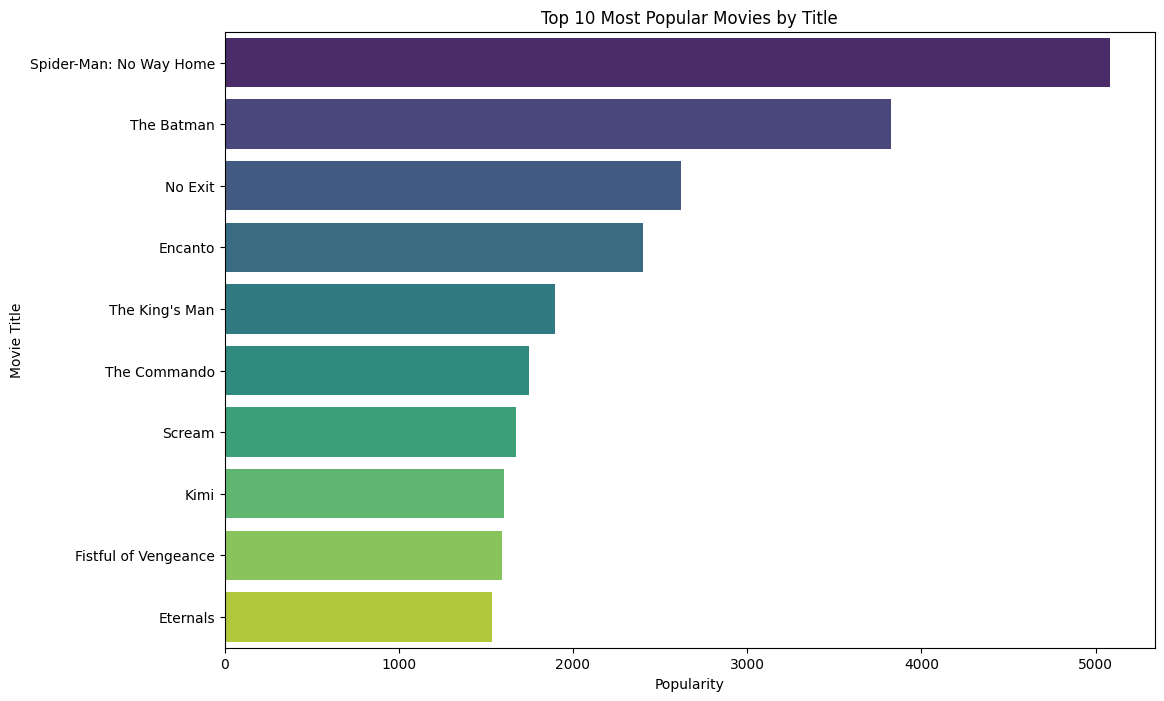

In [17]:
# Sort the dataset by popularity in descending order to get the most popular movies
top_popular_movies = movies.sort_values(by='Popularity', ascending=False).head(10)

# Create a bar plot to visualize the top-rated movies based on their titles
plt.figure(figsize=(12, 8))
sns.barplot(data=top_popular_movies, x='Popularity', y='Title', palette='viridis')
plt.title('Top 10 Most Popular Movies by Title')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.xticks(rotation=0)
plt.show()

**Gambar 4**

Dapat dilihat pada gambar diatas film dengan popularitas tertinggi adalah **Spider Man No Way Home** disusul dengan **The Batman** dan **No Exit**

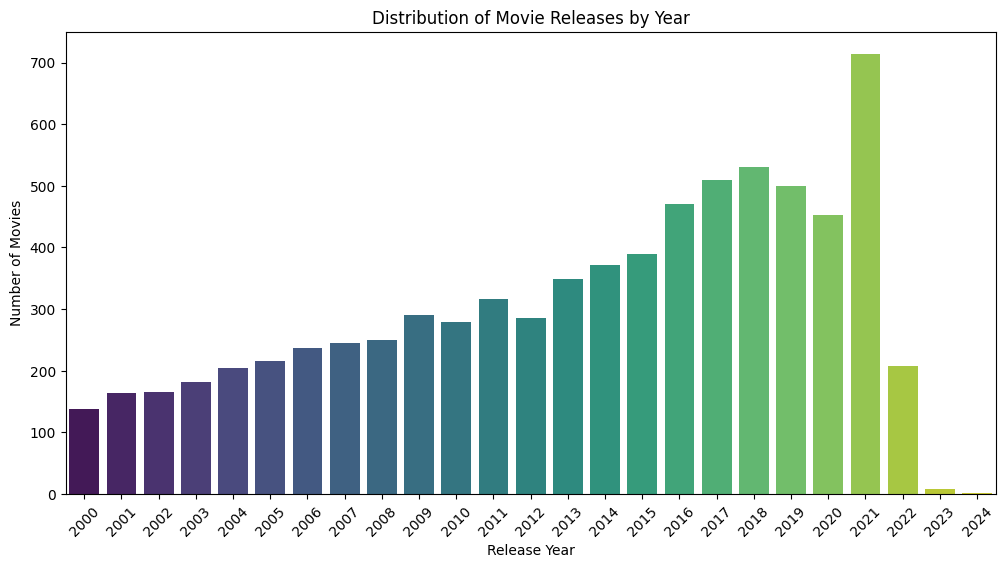

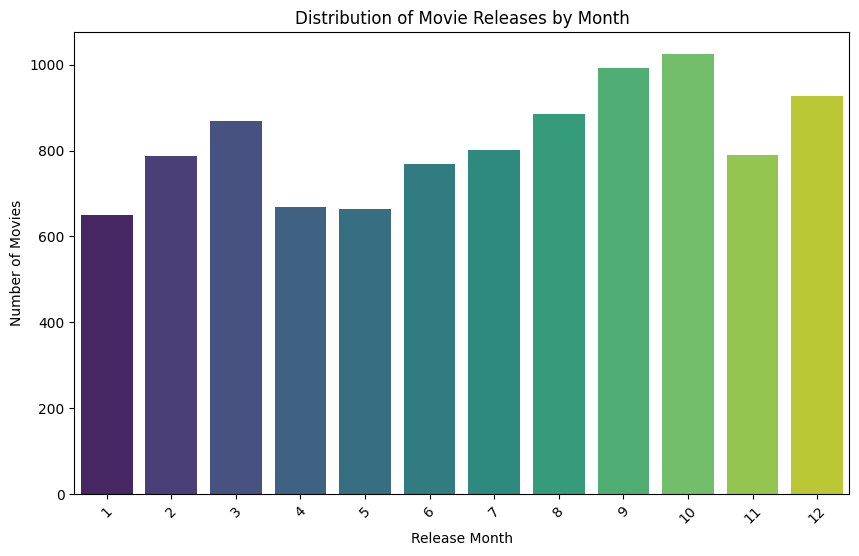

In [24]:
# Convert the 'Release_Date' column to a datetime object
movies['Release_Date'] = pd.to_datetime(movies['Release_Date'])

# Extract year and month from the release date
# Filter the dataset to include only releases between 2000 and 2024
movies_filtered = movies[(movies['Release_Date'].dt.year >= 2000) & (movies['Release_Date'].dt.year <= 2024)]
movies['Release_Month'] = movies['Release_Date'].dt.month

# Plot the distribution of movie releases by year
plt.figure(figsize=(12, 6))
sns.countplot(data=movies_filtered, x='Release_Year', palette='viridis')
plt.title('Distribution of Movie Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of movie releases by month
plt.figure(figsize=(10, 6))
sns.countplot(data=movies, x='Release_Month', palette='viridis')
plt.title('Distribution of Movie Releases by Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

**Gambar 5**

Dapat dilihat pada visualisasi diatas adalah distribusi jumlah film berdasarkan waktu rilisnya dan film terbanyak rilis di tahun 2021 dan untuk bulan rilis teranyak pada bulan 10

# Data Preparation

In [19]:
# Check Null Values
movies.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [20]:
# Check Duplicate
movies.duplicated().any()

False

<ipython-input-21-d3488c880392>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = movies.corr()


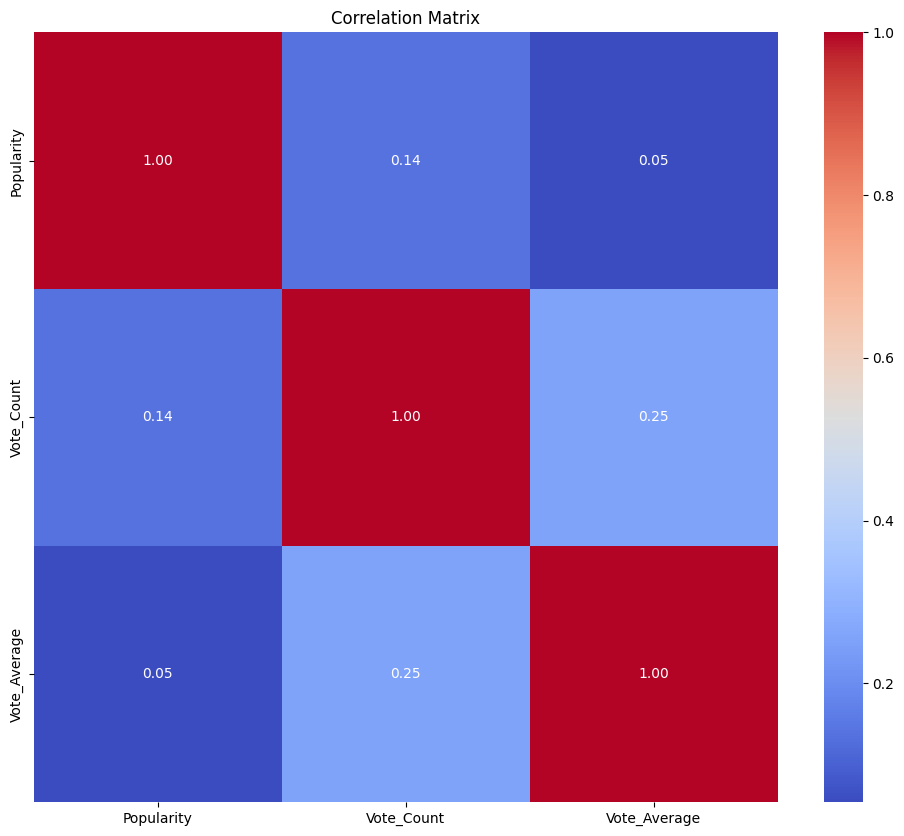

In [21]:
# Check column correlation
correlation_matrix = movies.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [49]:
# Drop Unecessary column
movies = movies.drop(['Poster_Url'], axis=1)

In [50]:
# Assuming 'Genre' is a list of genres separated by '|'
movies['Genres'] = movies['Genre'].str.split('|')

# Create a TF-IDF vectorizer for movie overviews
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
movies['Overview'] = movies['Overview'].fillna('')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['Overview'])

In [51]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Genres             9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


# Modelling and Evaluation

## Content-Based Filtering

In [ ]:
# Calculate cosine similarity between movie overviews
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [72]:
# Function to get movie recommendations based on movie title
def get_content_based_recommendations(title, cosine_sim=cosine_sim):
    # Check if the title is in the 'Title' column
    if title not in movies['Title'].values:
        return "Movie title not found in the dataset."

    # Get the index of the movie title
    idx = movies.index[movies['Title'] == title].tolist()[0]

    # Calculate similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top 10 similar movies
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    # Retrieve recommended movies' titles and genres
    recommended_movies = movies[['Title', 'Genre']].iloc[movie_indices]

    return recommended_movies

In [77]:
# Get content-based recommendations for a movie title
content_based_rec = get_content_based_recommendations('Spider-Man: No Way Home')
content_based_rec

,Title,Genre
170,Spider-Man,"Fantasy, Action"
4057,Spider-Man Strikes Back,"Action, Adventure, Family, Fantasy, TV Movie"
1490,Spider-Man,"Science Fiction, Action, Crime, TV Movie"
132,The Amazing Spider-Man 2,"Action, Adventure, Fantasy"
7939,Beyond the Ultimate Spin: The Making of 'Spide...,Documentary
201,Spider-Man 3,"Fantasy, Action, Adventure"
90,The Amazing Spider-Man,"Action, Adventure, Fantasy"
168,Spider-Man: Homecoming,"Action, Adventure, Science Fiction, Drama"
191,Spider-Man: Into the Spider-Verse,"Action, Adventure, Animation, Science Fiction"
144,Spider-Man: Far From Home,"Action, Adventure, Science Fiction"


## Hybrid Recommendation

In [66]:
# Sort movies by popularity (e.g., 'Popularity' or 'Vote_Count')
popularity_based_rec = movies.sort_values(by='Popularity', ascending=False)['Title'].head(10)
print(popularity_based_rec)

0    Spider-Man: No Way Home
1                 The Batman
2                    No Exit
3                    Encanto
4             The King's Man
5               The Commando
6                     Scream
7                       Kimi
8       Fistful of Vengeance
9                   Eternals
Name: Title, dtype: object


In [81]:
# Function to get hybrid recommendations with a limit of 10 recommendations
def get_hybrid_recommendations(title):
    content_rec = get_content_based_recommendations(title)
    popularity_rec = movies.sort_values(by='Popularity', ascending=False)[['Title', 'Genre']].head(10)
    hybrid_rec = content_rec.append(popularity_rec).drop_duplicates().head(10)
    return hybrid_rec

In [82]:
# Get hybrid recommendations for a movie title
hybrid_rec = get_hybrid_recommendations('The Commando')
hybrid_rec

<ipython-input-81-e36593d664ba>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hybrid_rec = content_rec.append(popularity_rec).drop_duplicates().head(10)


,Title,Genre
1817,2 Guns,"Action, Comedy, Crime"
9231,Transit,"Action, Thriller, Crime"
5214,Max Payne,"Crime, Action, Drama, Thriller"
9367,The Night of the Hunter,"Crime, Drama, Thriller"
4168,Good People,"Thriller, Crime, Action"
8629,The International,"Action, Thriller, Drama, Crime"
821,Now You See Me,"Thriller, Crime"
5217,Bad Samaritan,"Thriller, Crime, Horror"
5389,Commando 2 - The Black Money Trail,"Action, Thriller"
2656,Ghostland,"Horror, Mystery, Thriller"
